## A favorite example

For some reason, I find this example entertaining.  I took it from von Neumann and Morgenstern's book, which I don't have with me right now.  I copied the values in the matrix below from [this webpage](https://imowensims.wordpress.com/2016/01/02/sherlock-holmes-and-the-final-problem-a-game-of-pure-conflict/).  The solution is worked on that page, but I used python to find it.

Sherlock Holmes is being pursued by Prof. Moriarty, who, no doubt, intends great harm to Holmes.  Holmes reasons that if he can escape to the continent he stands a better chance of evading Moriarty.  Holmes collects Watson and they catch a train to Dover, where they can catch a boat to France.  

Alas, as the train is leaving the station Holmes spots Moriarty on the platform; worse, Moriarty clearly sees Holmes and pursues him in his private train.  Holmes reasons that he can get off the train either at Canterbury or Dover:

1. If he gets off the train at Canterbury, there's a chance that Moriarty will continue to Dover. Holmes can then hope to evade him and get to the continent another way.  Of course, Moriarty realizes this and might get off his train at Canterbury, which reduces Holmes' chances of escape.

2. If he gets of the train at Dover, there's a chance that Moriarty mistakenly gets off his train at Canterbury and Holmes can almost surely escape.  However, if Moriarty continues to Dover, Holmes will almost surely be caught.

We can capture the strategic problem in a normal form game:

<img src='mixedStrategyGraphics/Holmes-Moriarty.png' \>

Notice that this is a constant sum game; each cell sums to 100.  Whatever advantage Holmes might gain from a choice is subtracted from Moriarty's payoff, and vice versa.

Let's step through Holmes' reasoning. He wants to make Moriarty indifferent as to whether he gets off at Dover or Canterbury. 

So let's first calculate Moriarty's expected utility for getting off the train at Dover.  We let $p$ be the probability that Holmes gets off the train at Dover, so $1 - p$ is the probability that Holmes gets off the train at Canterbury:

$$ (80 \times p) + (30 \times (1 - p)) $$

Equally, suppose that Moriarty descends at Canterbury.  His expected utility is:

$$ (10 \times p) + (90 \times (1 - p)) $$

So Holmes wants to find the value of $p$ that makes the two equations equal:

$$ (80 \times p) + (30 \times (1 - p)) = (10 \times p) + (90 \times (1 - p)) $$

In [1]:
from sympy import Symbol, sympify

p = Symbol('p')
q = Symbol('q')

expr = sympify(80*p + (30 * (1 - p)) - (10*p + (90 * (1 - p))))

print(expr)

130*p - 60


So Holmes should get off the train at Dove with probability $\frac{6}{13}$ which works out to:

In [2]:
6 / 13

0.46153846153846156

In [3]:
expr = 80*.46 + (30 * (1 - .46))
print(expr)

53.00000000000001


In [4]:
from matplotlib import pyplot as plt

def frange(start,final,increment):
    numbers = []
    while start < final:
        numbers.append(start)
        start = start + increment

    return numbers


In [5]:
dover = []
canterbury = []

probs = frange(0,1,0.001)

for p in probs:
    doverUtilities = 80*p + (30 * (1 - p))
    dover.append(doverUtilities)   

plt.plot(probs,dover)

for p in probs:
    cantUtilities = 10*p + (90 * (1 - p))
    canterbury.append(cantUtilities)
    
plt.xlabel('Probability Holmes Leaves Train at Dover')
plt.ylabel('Moriarty\'s Expected Utility')
plt.plot(probs,canterbury)

ypoint = 53
xpoint = 6 /13

plt.plot(xpoint,ypoint,'ro')

plt.show

<function matplotlib.pyplot.show>

For completeness, we need to work out Moriarty's strategy.  He wants to make Holmes indifferent between getting off the train at Dover and getting off the train at Canterbury.

Let $q$ be the probability that Moriarty gets off the train at Dover.  Then, Holmes' expected utility for getting off the train at Dover is:

$$ 20*q + (90 * (1 - q)) $$

Holmes's expect utility for getting off the train in Canterbury is:

$$ 70*q + (10 * (1 - q)) $$

Therefore, Moriarty wants to set:

$$ 20*q + (90 * (1 - q)) = 70*q + (10 * (1 - q)) $$

So, we turn to python:

In [6]:
q = Symbol('q')

expr = sympify(20*q + (90 * (1 - q)) - (70*q + (10 * (1 - q))))

print(expr)

-130*q + 80


So $q = 8 / 13$; Moriarty should get off the train with probability $\frac{8}{13}$.

In [7]:
value = 20 * (8 / 13) + (90 * (1 - (8 / 13)))
print(value)

46.92307692307692


In [8]:
dover = []
canterbury = []

probs = frange(0,1,0.001)

for q in probs:
    doverUtilities = 20 * q + (90 * (1 - q))
    dover.append(doverUtilities)   

plt.plot(probs,dover)

for q in probs:
    cantUtilities = 70*q + (10 * (1 - q))
    canterbury.append(cantUtilities)
    
plt.xlabel('Probability Moriarty Leaves Train at Dover')
plt.ylabel('Holmes\'s Expected Utility')
plt.plot(probs,canterbury)

ypoint = 46.92
xpoint = 8 / 13

plt.plot(xpoint,ypoint,'ro')

plt.show

<function matplotlib.pyplot.show>

## Battle of the Sexes

<img src='mixedStrategyGraphics/Fig07_BoS.png' \>

Let's take the perspective of Bob.  He wants to find a probability distribution that makes Alice indifferent to the choice between going to a concert or going to a wrestling match.

Let $p$ be the probability that Bob selects the concert.  We now find Alice's expected utility for picking the concert:

$$ 2*p + 0 * (1 - p) = 2*p$$

We then calculate her expected utility for the wrestling match:

$$ 0*p + 1 * (1 - p) = 1 - p $$

We set Alice expected utility for the concert equal to her expected utility for the wrestling match:

$$ 2*p = 1 - p $$

So $p = \frac{1}{3}$.

<function matplotlib.pyplot.show>

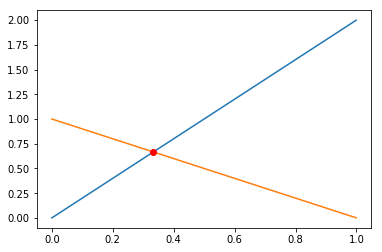

In [44]:
p = Symbol('p')

wrestling = []
concert = []

probs = frange(0,1,0.001)

for p in probs:
    expectedConcert = 2 * p
    concert.append(expectedConcert)
    
plt.plot(probs,concert)

for p in probs:
    expectedWrestling = 1 - p
    wrestling.append(expectedWrestling)
    
plt.plot(probs,wrestling)

xpoint = 1/3
ypoint = 1 - 1/3

plt.plot(xpoint,ypoint,'ro')


plt.show

Now we take Alice's perspective, compute Bob's expected utilities for the concert and wrestling, and then find the point at which he is indifferent.  

Let $q$ be the probability that Alice picks the concert.  Bob's expected utility for the concert is then:

$$ 1*q + 0*(1 - q) = q $$

Bob's expected utility for the wrestling match is:

$$ 0*q + 2 * (1 - q) = 2 - 2q$$

Finally, we set Bob's expected utility for the concert equal to his expected utility for the wresting match:

$$ q = 2 - 2q $$

That is: 

$$ q = 2/3 $$

In [48]:
q = Symbol('q')

wrestling = []
concert = []

probs = frange(0,1,0.001)

for q in probs:
    utilityWrestling = 2 - (2 * q)
    wrestling.append(utilityWrestling)
    
plt.plot(probs,wrestling)

for q in probs:
    utilityConcert = q
    concert.append(utilityConcert)

plt.plot(probs,concert)

xpoint = 2/3
ypoint = 2/3

plt.plot(xpoint,ypoint,'ro')

plt.show

<function matplotlib.pyplot.show>

## Snowdrift/Chicken

<img src='mixedStrategyGraphics/Fig10_Snowdrift.png' \>

Let's calculate the equilibrium from the point of view of Driver 1. Let $p$ be the probability that he waits. Driver 1 seeks a value for $p$ which makes Driver 2 indifferent between shoveling and waiting.  Let's first work out the expected utility for Driver 2 when he waits:

$$ 0*p + 40 * (1 - p) = 40 - 40*p $$

If Driver 2 decides to shovel, his expected utility is:

$$ 10 * p + 25 * (1 - p) = 10*p + 25 - 25*p = 25 - 15*p $$

In [12]:
p = Symbol('p')

expr = 40 - 40*p - ((10 * p) + (25 * (1 - p)))
value = sympify(expr)
print(value)

-25*p + 15


In [13]:
40 - 40 * (3/5)

16.0

In [14]:
10 * (3/5) + 25 - (25 * (3/5))

16.0

In [39]:
wait = []
shovel = []

probs = frange(0,1,0.001)

for p in probs:
    waitUtilities = 40 - (40 * p)
    wait.append(waitUtilities)
    
plt.plot(probs,wait)

for p in probs:
    shovelUtilities = (10 * p) + (25 * (1 - p))
    shovel.append(shovelUtilities)
    
plt.plot(probs,shovel)

ypoint = 16.0
xpoint = 3/5

plt.plot(xpoint,ypoint,'ro')

plt.xlabel("Probability Driver 1 waits")
plt.ylabel("Driver 2's expected utility")

plt.show

<function matplotlib.pyplot.show>

Let's try Chicken:

<img src='mixedStrategyGraphics/Fig06_Chicken.png' \>

Let's take the perspective of Teenager 2, who reasons as follows:  Let $p$ be the probability that I go straight.  Then Teenager 1's expected utility for going straight is:

$$ -2*p + 1*(1 - p) = 1 - 3*p $$

Equally, Teenager 1's expected utility for swerving is:

$$ -1*p + 0*(1 - p) = -1*p $$

In [22]:
p = Symbol('p')

expr = 1 - 3*p - (-1 * p)
expect = sympify(expr)
print(expect)

-2*p + 1


In [23]:
1 - 3 * (1 / 2)

-0.5

In [24]:
-1 * (1/2)

-0.5

In [27]:
1 - 3*(0.5)

-0.5

In [26]:
-1 * (-0.5)

0.5

<function matplotlib.pyplot.show>

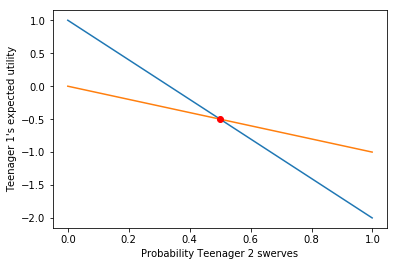

In [37]:
p = Symbol('p')

straight = []
swerve = []

probs = frange(0,1,0.001)

for p in probs:
    straightUtility = 1 - (3 * p)
    straight.append(straightUtility)
    
plt.plot(probs,straight)

for p in probs:
    swerveUtility = -1 * p
    swerve.append(swerveUtility)
    
plt.plot(probs,swerve)

xpoint = 0.5
ypoint = -0.5

plt.plot(xpoint,ypoint,'ro')

plt.xlabel("Probability Teenager 2 swerves")
plt.ylabel("Teenager 1's expected utility")

plt.show

## The Prisoner's Dilemma

<img src='mixedStrategyGraphics/PD_Figure01.png' \>

Eve reasons about Adam: Suppose I know that Adam is going to refuse to talk.  What is his expected utility given my distribution of strategies.  Let $p$ be the probability that Eve refuses to talk.  Then Adam's expected utility is:

$$ -1*p + (-10 * (1 - p)) $$

which simplifies to:

$$ p = 10/9 $$

Of course this is not a probability!

Now suppose that Adam talks.  Then, his expected utility is:

$$0*p + (-6 * (1 - p))$$

The expresssion simplifies to:

$$ p = 1 $$

Obviously, there's no sensible way to set these two expression to be equal.

In [36]:
p = Symbol('p')

refuse = []
talk = []

probs = frange(0,1,0.001)

for p in probs:
    AdamRefuse = -1*p + (-10 * (1 - p))
    refuse.append(AdamRefuse)
    
plt.plot(probs,refuse)

for p in probs:
    AdamTalk = -6*(1 - p)
    talk.append(AdamTalk)
    
plt.plot(probs,talk)

plt.ylabel("Adam's expected utility.")
plt.xlabel("Probability Eve refuses to talk")

plt.show

<function matplotlib.pyplot.show>

The upper line corresponds to the expected utility of talking.  The lower line corresponds to the expected utility of refusing to talk.  Clearly, the former dominates the latter.

## Stag Hunt

<img = src='mixedStrategyGraphics/Fig03_Stag.png' \>

The payoff structure is identical for both players, so we only need to work out the solution for one player.  Let's take the perspective of Hunter 2.  He sets about finding a probability distribution that would make Hunter 1 indifferent between hunting Stag and hunting Hare.

Let $p$ be the probability that Hunter 2 hunts Stag.  Hunter 1's expected utility for hunting Stag is then:

$$ 2*p + 0*(1 - p) = 2*p $$

Hunter 1's expected utility for hunting Hare is:

$$ 1 * p + 1 * 1 - p = 1 $$

Setting both sides equal, we get:

$$ 2*p = 1$$

So $p = \frac{1}{2}$

In [51]:
p = Symbol('p')

stag = []
hare = []

probs = frange(0,1,0.001)

for p in probs:
    expectedStag = 2*p
    stag.append(expectedStag)
    
plt.plot(probs,stag)

for p in probs:
    expectedHare = 1
    hare.append(expectedHare)

plt.plot(probs,hare)

xpoint = 1/2
ypoint = 1

plt.plot(xpoint,ypoint,'ro')

plt.show

<function matplotlib.pyplot.show>

## Aumann's Stag Hunt

<img src='mixedStrategyGraphics/Aumann_Stag.png' \>

Let's reason from Player 2's position.  Player 2 needs to make Player 1 indifferent between playing __c__ and playing __d__.  Suppose that we let $p$ be the probability that Player 2 plays $c$.  We first consider Player 1's expected utility for playing __c__:

$$ 9*p + 0*(1 - p) = 9*p $$

Player 1's utility for playing __d__ is:

$$ 8*p + 7*(1 - p) = 8*p + 7 - 7p = 7 + p $$

So we need to set the Player 1's utility functions for playing __c__  equal to the utility for playing __d__:

$$ 9*p = 7 + p $$

So $p = \frac{7}{8}$.

<function matplotlib.pyplot.show>

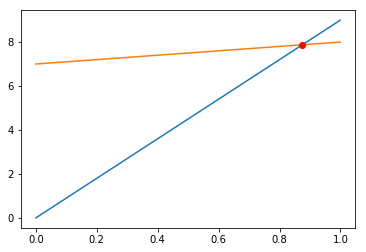

In [54]:
p = Symbol('p')

c = []
d = []

probs = frange(0,1,0.001)

for p in probs:
    cUtility = 9 * p
    c.append(cUtility)
    
plt.plot(probs,c)

for p in probs:
    dUtility = 7 + p
    d.append(dUtility)
    
plt.plot(probs,d)

xpoint = 7/8
ypoint = 7 + 7/8

plt.plot(xpoint,ypoint,'ro')

plt.show